In [1]:
from pycocotools.coco import COCO

In [3]:
 coco = COCO(annotation_file="/Users/stashakkarainen/Desktop/annotations/instances_train2017.json")

loading annotations into memory...
Done (t=34.69s)
creating index...
index created!


In [4]:
cat_cat = coco.getCatIds(catNms="cat")
horse_cat = coco.getCatIds(catNms="horse")
zebra_cat = coco.getCatIds(catNms="zebra")


In [5]:
cat_imgs = coco.getImgIds(catIds=cat_cat)
horse_imgs = coco.getImgIds(catIds=horse_cat)
zebra_imgs = coco.getImgIds(catIds=zebra_cat)

In [6]:
import random


In [84]:
random.shuffle(cat_imgs)
cat_imgs_train = cat_imgs[:2000]
cat_imgs_test = cat_imgs[2000:2500]

random.shuffle(horse_imgs)
horse_imgs_train = horse_imgs[:2000]
horse_imgs_test = horse_imgs[2000:2500]

random.shuffle(zebra_imgs)
zebra_imgs_train = zebra_imgs[:2000]
zebra_imgs_test = zebra_imgs[2000:2500]

In [85]:
cat_meta_train = coco.loadImgs(ids=cat_imgs_train)
cat_meta_test = coco.loadImgs(ids=cat_imgs_test)

horse_meta_train = coco.loadImgs(ids=horse_imgs_train)
horse_meta_test = coco.loadImgs(ids=horse_imgs_test)

zebra_meta_train = coco.loadImgs(ids=zebra_imgs_train)
zebra_meta_test = coco.loadImgs(ids=zebra_imgs_test)

In [86]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

In [87]:
def get_data(meta, datadir="/Users/stashakkarainen/Desktop/train2017"):
    return [(x['file_name'], Image.open("{}/{}".format(datadir, x['file_name'])).resize((100,100))) for x in meta]

In [88]:
cat_data_train = get_data(cat_meta_train)
horse_data_train = get_data(horse_meta_train)
cat_data_test = get_data(cat_meta_test)
horse_data_test = get_data(horse_meta_test)
zebra_data_train = get_data(zebra_meta_train)
zebra_data_test = get_data(zebra_meta_test)

In [89]:
import pandas as pd

In [90]:
cat_data_train_df = pd.DataFrame(cat_data_train)
cat_data_train_df['class'] = 'cat'

horse_data_train_df = pd.DataFrame(horse_data_train)
horse_data_train_df['class'] = 'horse'

cat_data_test_df = pd.DataFrame(cat_data_test)
cat_data_test_df['class'] = 'cat'

horse_data_test_df = pd.DataFrame(horse_data_test)
horse_data_test_df['class'] = 'horse'

zebra_data_train_df = pd.DataFrame(zebra_data_train)
zebra_data_train_df['class'] = 'zebra'

zebra_data_test_df = pd.DataFrame(zebra_data_test)
zebra_data_test_df['class'] = 'zebra'

In [91]:
train_df = pd.concat([cat_data_train_df, horse_data_train_df, zebra_data_train_df])
test_df = pd.concat([cat_data_test_df, horse_data_test_df, zebra_data_test_df])

In [92]:
test_df

,0,1,class
0,000000288268.jpg,<PIL.Image.Image image mode=RGB size=100x100 a...,cat
1,000000535679.jpg,<PIL.Image.Image image mode=RGB size=100x100 a...,cat
2,000000212605.jpg,<PIL.Image.Image image mode=RGB size=100x100 a...,cat
3,000000175729.jpg,<PIL.Image.Image image mode=RGB size=100x100 a...,cat
4,000000501788.jpg,<PIL.Image.Image image mode=RGB size=100x100 a...,cat
...,...,...,...
495,000000062151.jpg,<PIL.Image.Image image mode=RGB size=100x100 a...,horse
496,000000353952.jpg,<PIL.Image.Image image mode=L size=100x100 at ...,horse
497,000000256098.jpg,<PIL.Image.Image image mode=RGB size=100x100 a...,horse
498,000000363607.jpg,<PIL.Image.Image image mode=RGB size=100x100 a...,horse


In [93]:
train_y = [1 if x == 'cat' else 0 if x == 'horse' else 2 for x in train_df['class']]

In [94]:
test_y = [1 if x == 'cat' else 0  if x == 'horse' else 2 for x in test_df['class']]

In [95]:
train_df['imgs'] = train_df[1].apply(lambda x: x.convert('RGB'))

In [96]:
train_X = np.array([np.array(x) for x in train_df['imgs']])

In [97]:
train_X

array([[[[173, 170, 168],
         [139, 135, 128],
         [141, 133, 124],
         ...,
         [ 70,  67,  65],
         [ 64,  78,  14],
         [ 57,  81,   3]],

        [[173, 169, 166],
         [150, 145, 143],
         [136, 128, 118],
         ...,
         [ 24,  64,  41],
         [ 21,  65,  29],
         [ 22,  66,  11]],

        [[173, 167, 165],
         [160, 155, 152],
         [133, 124, 114],
         ...,
         [  4,  64,  31],
         [  4,  61,  28],
         [  3,  58,  18]],

        ...,

        [[ 86,  68,   9],
         [ 88,  67,   8],
         [ 88,  66,  19],
         ...,
         [ 49,  35,   7],
         [ 40,  27,   9],
         [ 31,  18,   8]],

        [[ 86,  67,   8],
         [ 89,  67,  13],
         [ 88,  66,  17],
         ...,
         [ 53,  36,   6],
         [ 43,  31,   8],
         [ 36,  22,   7]],

        [[ 87,  65,  10],
         [ 88,  64,  17],
         [ 87,  68,  21],
         ...,
         [ 55,  34,   6],
        

In [98]:
test_df['imgs'] = test_df[1].apply(lambda x: x.convert('RGB'))

In [99]:
test_X = np.array([np.array(x) for x in test_df['imgs']])

In [100]:
test_X

array([[[[ 98,  17,  32],
         [ 74,  14,  33],
         [ 61,  11,  27],
         ...,
         [172, 162, 179],
         [173, 162, 181],
         [173, 163, 188]],

        [[103,  19,  36],
         [ 81,  15,  30],
         [ 66,  12,  27],
         ...,
         [190, 207, 239],
         [188, 202, 230],
         [181, 185, 213]],

        [[108,  20,  30],
         [ 83,  17,  29],
         [ 67,  13,  29],
         ...,
         [176, 170, 193],
         [183, 180, 202],
         [186, 189, 217]],

        ...,

        [[171, 153, 143],
         [173, 156, 145],
         [174, 158, 152],
         ...,
         [187, 161, 138],
         [179, 154, 131],
         [175, 148, 130]],

        [[169, 150, 145],
         [169, 151, 145],
         [172, 156, 149],
         ...,
         [180, 153, 132],
         [175, 146, 129],
         [172, 144, 129]],

        [[167, 148, 141],
         [168, 149, 144],
         [171, 154, 146],
         ...,
         [174, 149, 126],
        

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
all_X = np.concatenate((train_X, test_X))
all_X.shape

(6916, 100, 100, 3)

In [106]:
all_X_scaled = StandardScaler().fit_transform(all_X.reshape(6916,30000)).reshape(6916, 100, 100, 3)

In [107]:
all_X_scaled.shape

(6916, 100, 100, 3)

In [108]:
all_X_scaled

array([[[[ 7.34950280e-01,  6.70256306e-01,  6.77510716e-01],
         [ 2.60022972e-01,  1.87129579e-01,  1.75002622e-01],
         [ 2.74145097e-01,  1.47823572e-01,  1.14737233e-01],
         ...,
         [-6.76117407e-01, -7.23783562e-01, -6.05824553e-01],
         [-7.46535707e-01, -5.70101479e-01, -1.21778618e+00],
         [-8.28929171e-01, -5.16729153e-01, -1.34413729e+00]],

        [[ 7.36671038e-01,  6.60619998e-01,  6.59338588e-01],
         [ 4.10356737e-01,  3.23889077e-01,  3.65367154e-01],
         [ 2.05974964e-01,  8.06857125e-02,  4.55014450e-02],
         ...,
         [-1.30702253e+00, -7.71526464e-01, -9.04442716e-01],
         [-1.33025062e+00, -7.45682406e-01, -1.04196655e+00],
         [-1.30112380e+00, -7.17081092e-01, -1.25023927e+00]],

        [[ 7.37164286e-01,  6.35701037e-01,  6.52037917e-01],
         [ 5.50089700e-01,  4.65132134e-01,  4.85000238e-01],
         [ 1.68978970e-01,  3.25076670e-02,  3.52898084e-03],
         ...,
         [-1.58970560e+0

In [109]:
train_X = all_X_scaled[:1400]
test_X = all_X_scaled[1400:]
train_X.shape, test_X.shape

((1400, 100, 100, 3), (5516, 100, 100, 3))

In [110]:
import torch

In [111]:
device = torch.device("cpu")

In [112]:
train_X_tensor = torch.Tensor(train_X)

In [113]:
train_X_gpu = train_X_tensor.to(device)

In [114]:
test_X_tensor = torch.Tensor(test_X)

In [115]:
test_X_gpu = test_X_tensor.to(device)

In [116]:
train_y_gpu = torch.Tensor(train_y).to(device)

In [117]:
test_y_gpu = torch.Tensor(test_y).to(device)

In [189]:
test_y_gpu.size()

torch.Size([1000])

In [118]:
train_X_tensor.size()

torch.Size([1400, 100, 100, 3])

In [119]:
class Batcher:
    def __init__(self, X, y, device, batch_size=5, max_iter=None):
        self.X = X
        self.y = y
        self.device = device
        self.batch_size=batch_size
        self.max_iter = max_iter
        self.curr_iter = 0
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.curr_iter == self.max_iter:
            raise StopIteration
        permutation = torch.randperm(self.X.size()[0], device=self.device)
        permX = self.X[permutation]
        permy = self.y[permutation]
        splitX = torch.split(permX, self.batch_size)
        splity = torch.split(permy, self.batch_size)
        
        self.curr_iter += 1
        return zip(splitX, splity)

In [120]:
import torch.nn as nn

In [121]:
c1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, padding=1)
c1 = c1.to(device)
b1 = nn.BatchNorm2d(3).to(device)
m1 = nn.MaxPool2d(2,2)
m1 = m1.to(device)
tanh = nn.Tanh().to(device)

In [122]:
btest = Batcher(train_X_gpu, train_y_gpu, device)
batch = next(next(btest))

In [124]:
batch_tensor = batch[0].permute(0, 3, 1, 2)
batch_tensor

tensor([[[[-1.4216e+00, -1.4206e+00, -1.2322e+00,  ..., -6.6269e-01,
           -6.7959e-01, -6.6780e-01],
          [-1.3791e+00, -1.2968e+00, -1.1779e+00,  ..., -6.6883e-01,
           -6.6864e-01, -6.5417e-01],
          [-1.0874e+00, -9.5777e-01, -1.0010e+00,  ..., -6.5898e-01,
           -6.6199e-01, -6.1718e-01],
          ...,
          [-1.3401e+00, -1.3958e+00, -1.4309e+00,  ..., -1.4763e+00,
           -1.4631e+00, -1.4359e+00],
          [-1.3951e+00, -1.4021e+00, -1.3994e+00,  ..., -1.4619e+00,
           -1.4381e+00, -1.4462e+00],
          [-1.3770e+00, -1.3766e+00, -1.3826e+00,  ..., -1.4571e+00,
           -1.4290e+00, -1.4318e+00]],

         [[-1.4387e+00, -1.4501e+00, -1.3297e+00,  ..., -6.7070e-01,
           -6.6274e-01, -6.4948e-01],
          [-1.4225e+00, -1.3679e+00, -1.3322e+00,  ..., -6.7751e-01,
           -6.7887e-01, -6.6373e-01],
          [-1.1587e+00, -1.0848e+00, -1.1415e+00,  ..., -6.6697e-01,
           -6.7053e-01, -6.3839e-01],
          ...,
     

In [125]:
step = c1(batch_tensor)

In [126]:
step = b1(step)

In [127]:
step = m1(step)

In [128]:
relu = nn.ReLU().to(device)
step = relu(step)
step.size()

torch.Size([5, 3, 50, 50])

In [129]:
linear = nn.Linear(3*50*50, 3*50*25).to(device)

In [130]:
step = linear(step.reshape(-1, 3*50*50))


In [131]:
linear = nn.Linear(3*50*25, 1).to(device)

In [132]:
step = linear(step)

In [149]:
class CatHorseClassifier(nn.Module):
    def __init__(self, hidden_size, height, width, num_classes):
        super(CatHorseClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.device = device
        self.height = height
        self.width = width
        self.num_classes = num_classes  # Number of output classes (e.g., 3)

        self.layers1 = nn.Sequential(
            nn.Conv2d(3, 3, 3, padding=1),
            nn.BatchNorm2d(3),
            nn.Tanh()
        )

        self.layers2 = nn.Sequential(
            nn.Linear(self.height * self.width * 3, hidden_size),
            nn.Dropout(0.05),
            nn.Tanh(),
            nn.Linear(hidden_size, int(hidden_size/2)),
            nn.Tanh(),
            nn.Linear(int(hidden_size/2), num_classes),  # Output layer with 3 units for 3 classes
        )

    def forward(self, batch):
        current_matrix = batch.permute(0, 3, 1, 2)
        current_matrix = self.layers1(current_matrix)

        return torch.sigmoid(self.layers2(current_matrix.reshape(-1, self.height * self.width * 3)))


In [150]:
import torch.optim as optim

In [155]:
def train(X, y, batch_size, epochs, device, model=None):
    b = Batcher(X, y, device, batch_size=batch_size, max_iter=epochs)
    if not model:
        num_classes = len(torch.unique(train_y_gpu))
        m = CatHorseClassifier(3000, X[0].size()[0], X[0].size()[1], num_classes)  # Update num_classes based on your problem (e.g., 3)
        m = m.to(device)
    else:
        m = model
    
    loss = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(m.parameters(), lr=0.005)
    epoch = 0
    
    for split in b:
        tot_loss = 0
        for batch in split:
            optimizer.zero_grad()
            o = m(batch[0].float())
            l = loss(o, batch[1].long())  # No need for reshaping the output and target
            tot_loss += l.item()  # Use item() to obtain a scalar loss value
            l.backward()
            optimizer.step()
        print("Total loss in epoch {} is {}.".format(epoch, tot_loss))
        epoch += 1
        
    return m


In [156]:
model = train(train_X_gpu, train_y_gpu, 25, 5, device)

Total loss in epoch 0 is 47.361022770404816.
Total loss in epoch 1 is 31.187540352344513.
Total loss in epoch 2 is 30.916430592536926.
Total loss in epoch 3 is 30.898219347000122.
Total loss in epoch 4 is 30.888228595256805.


In [157]:
model = train(train_X_gpu, train_y_gpu, 25, 10, device, model)

Total loss in epoch 0 is 31.167004883289337.
Total loss in epoch 1 is 31.000965118408203.
Total loss in epoch 2 is 30.880927622318268.
Total loss in epoch 3 is 30.880902528762817.
Total loss in epoch 4 is 30.8809015750885.
Total loss in epoch 5 is 30.88090080022812.
Total loss in epoch 6 is 30.88090080022812.
Total loss in epoch 7 is 30.88090091943741.
Total loss in epoch 8 is 30.880900502204895.
Total loss in epoch 9 is 30.880900621414185.


In [158]:
list(model.parameters())

[Parameter containing:
 tensor([[[[-0.0563,  0.0269, -0.1529],
           [ 0.1745,  0.0941,  0.2220],
           [-0.1082,  0.2169, -0.0061]],
 
          [[ 0.1237,  0.2463,  0.2640],
           [-0.0347,  0.2089, -0.0456],
           [-0.0262, -0.0149,  0.0480]],
 
          [[ 0.1162,  0.1478,  0.1122],
           [ 0.3050, -0.0515,  0.0761],
           [ 0.1228, -0.0412,  0.1560]]],
 
 
         [[[ 0.1085,  0.2188,  0.1675],
           [ 0.2237,  0.0025,  0.0911],
           [ 0.1228,  0.1891,  0.0286]],
 
          [[-0.0894,  0.0086, -0.1638],
           [-0.0390,  0.0812, -0.0539],
           [ 0.0943, -0.0441, -0.1160]],
 
          [[-0.0276, -0.0810, -0.0333],
           [ 0.0374,  0.0620, -0.0580],
           [-0.1593, -0.1344, -0.1634]]],
 
 
         [[[ 0.0402, -0.0844, -0.1213],
           [ 0.0007,  0.1299,  0.1205],
           [ 0.1657,  0.0661,  0.1353]],
 
          [[-0.1683, -0.0672,  0.1537],
           [-0.1906, -0.0680, -0.0706],
           [-0.1037, -0.1031, 

In [159]:
with torch.no_grad():
    predictions = model(test_X_gpu)

In [161]:
test_X_gpu.size()

torch.Size([5516, 100, 100, 3])

In [187]:
print("test_y_gpu size:", test_y_gpu.size())
print("predictions size:", predictions.size())


test_y_gpu size: torch.Size([1000])
predictions size: torch.Size([16548])


In [192]:
predictions = predictions.reshape(-1)
predictions = predictions[:1000]
test_y_gpu.size(), predictions.size()

(torch.Size([1000]), torch.Size([1000]))

In [193]:
classes = predictions >= 0.5

In [194]:
classes = classes.float()

In [195]:
classes

tensor([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 

In [213]:
# For 'horse' (class 0)
horse_mask = (test_y_gpu == 0).float()
tp_horse = sum(classes * horse_mask)
fp_horse = sum(classes * ((1 - horse_mask).bool()).float())
tn_horse = sum((~classes.bool()).float() * ((1 - horse_mask).bool()).float())  # Use ~ for inversion
fn_horse = sum((~classes.bool()).float() * horse_mask)

# For 'cat' (class 1)
cat_mask = (test_y_gpu == 1).float()
tp_cat = sum(classes * cat_mask)
fp_cat = sum(classes * ((1 - cat_mask).bool()).float())
tn_cat = sum((~classes.bool()).float() * ((1 - cat_mask).bool()).float())  # Use ~ for inversion
fn_cat = sum((~classes.bool()).float() * cat_mask)

# For 'zebra' (class 2)
zebra_mask = (test_y_gpu == 2).float()
tp_zebra = sum(classes * zebra_mask)
fp_zebra = sum(classes * ((1 - zebra_mask).bool()).float())
tn_zebra = sum((~classes.bool()).float() * ((1 - zebra_mask).bool()).float())  # Use ~ for inversion
fn_zebra = sum((~classes.bool()).float() * zebra_mask)


In [217]:
accuracy_horse = (tp_horse + tn_horse) / (tp_horse + fp_horse + tn_horse + fn_horse)
print(accuracy_horse)

accuracy_cat = (tp_cat + tn_cat) / (tp_cat + fp_cat + tn_cat + fn_cat)
print(accuracy_cat)

accuracy_zebra = (tp_zebra + tn_zebra) / (tp_zebra + fp_zebra + tn_zebra + fn_zebra)
print(accuracy_zebra)

tensor(0.4990)
tensor(0.5010)
tensor(0.6670)


In [220]:
recall_horse = tp_horse / (tp_horse + fn_horse)
print(recall_horse)

recall_cat = tp_cat / (tp_cat + fn_cat)
print(recall_cat)

recall_zebra = tp_zebra / (tp_zebra + fn_zebra)
print(recall_zebra)

tensor(0.3320)
tensor(0.3340)
tensor(nan)


In [222]:
precision_horse = tp_horse / (tp_horse + fp_horse)
print(precision_horse)

precision_cat = tp_cat / (tp_cat + fp_cat)
print(precision_cat)

precision_zebra = tp_zebra / (tp_zebra + fp_zebra)
print(precision_zebra)

tensor(0.4985)
tensor(0.5015)
tensor(0.)


In [225]:
f1_horse = (2 * recall_horse * precision_horse) / (recall_horse + precision_horse)
print(f1_horse)

f1_cat = (2 * recall_cat * precision_cat) / (recall_cat + precision_cat)
print(f1_cat)

f1_zebra = (2 * recall_zebra * precision_zebra) / (recall_zebra + precision_zebra)
print(f1_zebra)

tensor(0.3986)
tensor(0.4010)
tensor(nan)


In [231]:
def precision_recall_horse(data, preds, incr=0.1):
    threshold = 0.0
    vals = []
    while threshold < 0.99:
        classes = preds >= threshold
        classes = classes.float()
        tp = sum(classes * data)
        fp = sum(classes * (~data.bool()).float())
        fn = sum((~classes.bool()).float() * data)

        recall = tp / (tp + fn)
        precision = tp / (tp + fp)

        vals.append((float(precision), float(recall)))
        threshold += incr
        
    return list(zip(*vals))

In [232]:
prc = precision_recall(test_y_gpu, predictions, incr=0.05)

Text(0.5, 0, 'Recall')

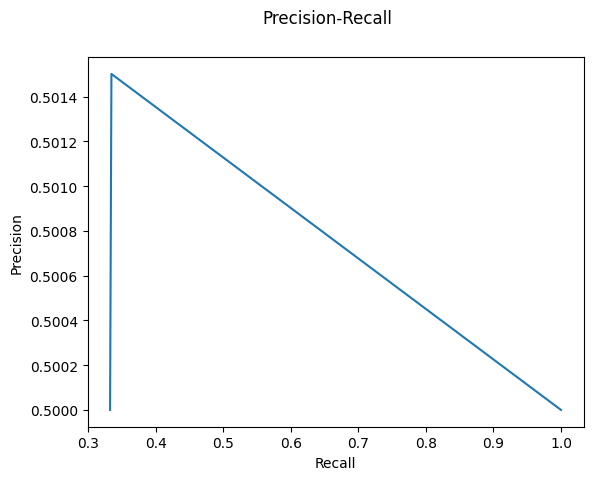

In [233]:
fig = plt.figure()
plt.plot(prc[1], prc[0])
fig.suptitle("Precision-Recall")
plt.ylabel("Precision")
plt.xlabel("Recall")

In [234]:
def roccurve(data, preds, pos_count, incr=0.1):
    threshold = 0.0
    vals = []
    while threshold < 0.99:
        classes = preds >= threshold
        classes = classes.float()

        tp = sum(classes * data)
        fp = sum(classes * (~data.bool()).float())

        vals.append((tp/pos_count, fp/pos_count))
        threshold += incr
        
    return list(zip(*vals))

In [235]:
roc = roccurve(test_y_gpu, predictions, 500, incr=0.05)

Text(0.5, 0, 'False Positive')

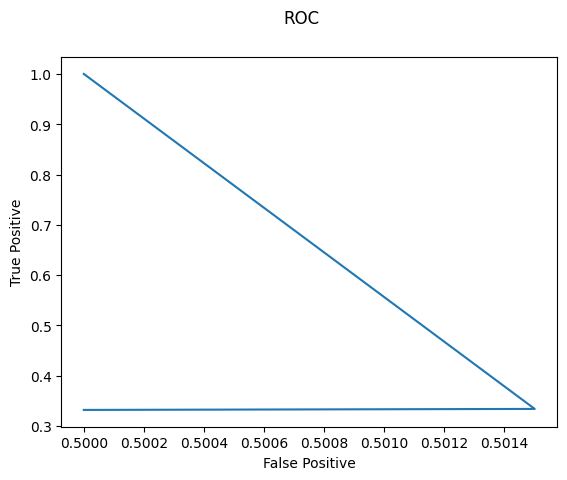

In [236]:
fig = plt.figure()
plt.plot(prc[0], prc[1])
fig.suptitle("ROC")
plt.ylabel("True Positive")
plt.xlabel("False Positive")